In [ ]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import glob

In [70]:
samples = {
    "bff (200GeV)": "test_cutflow_bff/*.root",
    "tt": "test_cutflow_tt/*.root",
    "dy(50_120)": "test_cutflow_dy/*.root",
    "dy(400_800)": "test_cutflow_dy_400_800/*.root"
}

In [71]:
def get_numpy_cutflow(_upf):
    return  _upf['cutflow_weighted'].values()

def get_values(file_glob, normalize=False, zero_value=-1):
    files = glob.glob(file_glob)
    for i, root_file in enumerate(files):
        _upf = uproot.open(root_file)
        if i == 0:
            cutflow = get_numpy_cutflow(_upf)
        else:
            cutflow += get_numpy_cutflow(_upf)
    if zero_value > 0: cutflow[0] = zero_value
    return cutflow

def make_value_dict(sample_dict):
    return {k: get_values(v, zero_value=1000) for k,v in sample_dict.items()}

In [72]:
value_dict = make_value_dict(samples)

In [76]:
def plot_cutflow(ax, values, normalize=False, offset=0, **kwargs):
    cut_names = ['All Events', 'After HLT', 'After N Leptons', 'After N Jets']
    x = np.arange(len(cut_names))
    if normalize: values = values/values[0]
    ax.bar(x+offset, values, **kwargs)
    ax.set_xticks(x)
    ax.set_xticklabels(cut_names)

tt:[1000.  280.   42.   22.]
dy(50_120):[1000.  147.    5.    4.]
dy(400_800):[1000.  946.  612.  211.]
bff (200GeV):[1000.  827.  533.  214.]


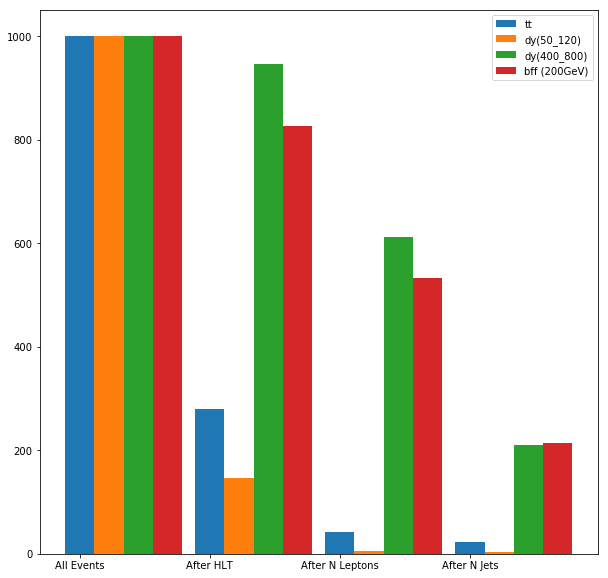

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
n_plots = len(value_dict)
for i, (k,v) in enumerate(value_dict.items()):
    #add boundary between each bin in cutflow
    boundary=.1
    width = (1.0-boundary)/n_plots
    offset = float(i)/n_plots*(1.0-boundary)
    plot_cutflow(ax, v, offset=offset, width = width, label=k)
    print("{}:{}".format(k, v))
ax.legend()
#ax.set_yscale('log')
fig.savefig("cutflow.png", facecolor='white')

In [80]:
upf = uproot.open("test_cutflow_tt/4A5B7C8A-4B39-8245-BB10-472F0DC5679D_Skim.root")

In [ ]:
up